## **Assignment 7 Description**

In this assignment, you are expected to work in groups to familiarize yourself with Transfer Learning using various deep learning models, such as VGG16 and Xception. There are two tasks in the assignment as follows and this python notebook is regarding Task 1

# **Task 1: Transfer Learning on Flowers Dataset (30 points)**

## **Dataset Description**

We are going to use the inbuilt Flowers Dataset for this task!

## **Instructions**

Refer to Chapter 14 of Géron which discusses how to apply pre-trained models for transfer learning. Implement transfer learning using the Xception model on the Flowers dataset as indicated in the reference material.

## **Objective**

The objective of this restriction is to avoid penalizing groups that do not have access to powerful machines and/or machines with GPUs. Groups are allowed to use Google Colab with GPUs to train the models, but be aware there are resource usage limitations.

## **Hint**

Feel free to use PyTorch instead of Tensorflow.


## **Goal**

Refer to Chapter 14 of Géron which discusses how to apply pre-trained models for transfer learning. Implement transfer learning using the Xception model on the Flowers dataset as indicated in thereference material.

## **TODO: Initial Implementation using Xception Model with Dataset Exploration**

In [ ]:
# import required modules
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules

In [ ]:
dataset, info = tfds.load("tf_flowers", as_supervised = True, with_info = True)

In [ ]:
info.splits

{'train': <SplitInfo num_examples=3670, num_shards=2>}

In [ ]:
dataset_size = info.splits["train"].num_examples
print(dataset_size)

3670


In [ ]:
class_names = info.features["label"].names
n_classes = info.features["label"].num_classes
print(class_names, n_classes)

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses'] 5


In [ ]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

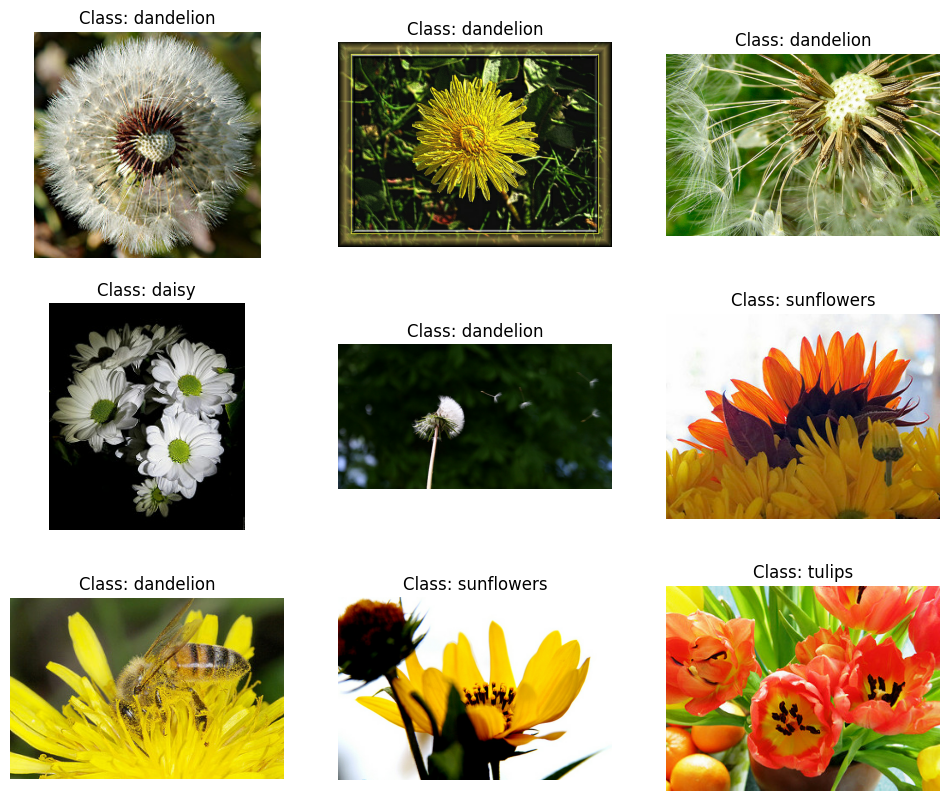

In [ ]:
plt.figure(figsize =(12,10))
index = 0
for image, label in train_set_raw.take(9):
    index +=1
    plt.subplot(3,3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")
plt.show()

In [ ]:
def preprocess(image, label):
    resized_image = tf.image.resize(image,[224,224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

In [ ]:
batch_size = 32
train_set = train_set_raw.shuffle(1000)
train_set = train_set.map(preprocess).batch(batch_size).prefetch(1) # Prefetch one batch to make sure that a batch is ready to be served at all time
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

In [ ]:
base_model = keras.applications.xception.Xception(weights="imagenet", include_top = False)

# We will now add our own global average pooling layer followed by a dense output layer with one
# unit per class using the softmax activation function.

avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation = "softmax")(avg)
model = keras.Model(inputs = base_model.input, outputs = output)

In [ ]:
for index, layer in enumerate(base_model.layers):
    print(index,layer.name)

0 input_4
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_12
13 block2_pool
14 batch_normalization_12
15 add_36
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_13
23 block3_pool
24 batch_normalization_13
25 add_37
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_14
33 block4_pool
34 batch_normalization_14
35 add_38
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_39
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 blo

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
initial_learning_rate = 0.2
decay_steps = 1000
decay_rate = 0.1
learning_rate_fn = schedules.ExponentialDecay(
    initial_learning_rate, decay_steps, decay_rate
)

optimizer = optimizers.SGD(learning_rate=learning_rate_fn, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=10)

Epoch 1/10
86/86 [==============================] - 18s 159ms/step - loss: 1.1422 - accuracy: 0.7976 - val_loss: 1.4389 - val_accuracy: 0.8143
Epoch 2/10
86/86 [==============================] - 14s 157ms/step - loss: 0.5394 - accuracy: 0.8935 - val_loss: 0.9894 - val_accuracy: 0.8493
Epoch 3/10
86/86 [==============================] - 14s 159ms/step - loss: 0.2517 - accuracy: 0.9335 - val_loss: 0.8333 - val_accuracy: 0.8621
Epoch 4/10
86/86 [==============================] - 14s 158ms/step - loss: 0.1471 - accuracy: 0.9582 - val_loss: 0.8684 - val_accuracy: 0.8603
Epoch 5/10
86/86 [==============================] - 13s 154ms/step - loss: 0.0690 - accuracy: 0.9786 - val_loss: 0.7982 - val_accuracy: 0.8676
Epoch 6/10
86/86 [==============================] - 13s 153ms/step - loss: 0.0336 - accuracy: 0.9898 - val_loss: 0.8078 - val_accuracy: 0.8603
Epoch 7/10
86/86 [==============================] - 13s 156ms/step - loss: 0.0185 - accuracy: 0.9956 - val_loss: 0.7903 - val_accuracy: 0.8621

In [ ]:
for layer in base_model.layers:
    layer.trainable = True

In [ ]:
initial_learning_rate = 0.01
decay_steps = 1000
decay_rate = 0.001
learning_rate_fn = schedules.ExponentialDecay(
    initial_learning_rate, decay_steps, decay_rate
)

optimizer = keras.optimizers.SGD(learning_rate=learning_rate_fn, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=50)

Epoch 1/50
86/86 [==============================] - 55s 499ms/step - loss: 0.4061 - accuracy: 0.8750 - val_loss: 0.5271 - val_accuracy: 0.8713
Epoch 2/50
86/86 [==============================] - 41s 480ms/step - loss: 0.0524 - accuracy: 0.9836 - val_loss: 0.2948 - val_accuracy: 0.9081
Epoch 3/50
86/86 [==============================] - 41s 481ms/step - loss: 0.0143 - accuracy: 0.9967 - val_loss: 0.2646 - val_accuracy: 0.9283
Epoch 4/50
86/86 [==============================] - 41s 479ms/step - loss: 0.0145 - accuracy: 0.9967 - val_loss: 0.2658 - val_accuracy: 0.9283
Epoch 5/50
86/86 [==============================] - 41s 479ms/step - loss: 0.0080 - accuracy: 0.9971 - val_loss: 0.2695 - val_accuracy: 0.9265
Epoch 6/50
86/86 [==============================] - 42s 483ms/step - loss: 0.0072 - accuracy: 0.9982 - val_loss: 0.2774 - val_accuracy: 0.9246
Epoch 7/50
86/86 [==============================] - 42s 483ms/step - loss: 0.0059 - accuracy: 0.9975 - val_loss: 0.2800 - val_accuracy: 0.9246

In [ ]:
test_loss, test_accuracy = model.evaluate(test_set)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

12/12 [==============================] - 2s 119ms/step - loss: 0.3442 - accuracy: 0.9264
Test Loss: 0.34422746300697327
Test Accuracy: 0.9264305233955383


## **TODO: Implementation using Xception Model (As mentioned in the Chapter 14 of Géron book)**

In [ ]:
# import required modules
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow_datasets as tfds

from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules

In [ ]:
#Load the dataset
dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)
dataset_size = info.splits["train"].num_examples # 3670
class_names = info.features["label"].names # ["dandelion", "daisy", ...]
n_classes = info.features["label"].num_classes # 5

In [ ]:
test_set, valid_set, train_set = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

In [ ]:
def preprocess(image, label):
 resized_image = tf.image.resize(image, [224, 224])
 final_image = keras.applications.xception.preprocess_input(resized_image)
 return final_image, label

In [ ]:
batch_size = 32
train_set = train_set.shuffle(1000).repeat()
train_set = train_set.map(preprocess).batch(batch_size).prefetch(1)
valid_set = valid_set.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set.map(preprocess).batch(batch_size).prefetch(1)

In [ ]:
base_model = keras.applications.xception.Xception(weights="imagenet",
 include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [ ]:
for layer in base_model.layers:
 layer.trainable = False

In [ ]:
# Define a learning rate schedule with decay
initial_learning_rate = 0.2
decay_steps = 1000
decay_rate = 0.1
learning_rate_fn = schedules.ExponentialDecay(
    initial_learning_rate, decay_steps, decay_rate
)

# Create the SGD optimizer with the learning rate schedule
optimizer = optimizers.SGD(learning_rate=learning_rate_fn, momentum=0.9)

# Compile the model with the optimizer
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Train the model
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=5)

Epoch 1/5
86/86 [==============================] - 18s 169ms/step - loss: 1.2414 - accuracy: 0.7958 - val_loss: 1.0855 - val_accuracy: 0.8327
Epoch 2/5
86/86 [==============================] - 14s 163ms/step - loss: 0.5589 - accuracy: 0.8993 - val_loss: 0.9543 - val_accuracy: 0.8511
Epoch 3/5
86/86 [==============================] - 13s 157ms/step - loss: 0.2598 - accuracy: 0.9433 - val_loss: 0.9482 - val_accuracy: 0.8548
Epoch 4/5
86/86 [==============================] - 13s 154ms/step - loss: 0.1460 - accuracy: 0.9571 - val_loss: 0.9528 - val_accuracy: 0.8456
Epoch 5/5
86/86 [==============================] - 13s 153ms/step - loss: 0.0801 - accuracy: 0.9746 - val_loss: 0.8765 - val_accuracy: 0.8548


In [ ]:
for layer in base_model.layers:
 layer.trainable = True

In [ ]:
# Define a learning rate schedule with decay
initial_learning_rate = 0.01
decay_steps = 1000
decay_rate = 0.001
learning_rate_fn = schedules.ExponentialDecay(
    initial_learning_rate, decay_steps, decay_rate
)

# Create the SGD optimizer with the learning rate schedule
optimizer = keras.optimizers.SGD(learning_rate=learning_rate_fn, momentum=0.9)

# Compile the model with the optimizer
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Train the model
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=5)

Epoch 1/5
86/86 [==============================] - 54s 493ms/step - loss: 0.3860 - accuracy: 0.8786 - val_loss: 0.5182 - val_accuracy: 0.8750
Epoch 2/5
86/86 [==============================] - 41s 475ms/step - loss: 0.0696 - accuracy: 0.9804 - val_loss: 0.4373 - val_accuracy: 0.8934
Epoch 3/5
86/86 [==============================] - 41s 473ms/step - loss: 0.0266 - accuracy: 0.9909 - val_loss: 0.3609 - val_accuracy: 0.9062
Epoch 4/5
86/86 [==============================] - 41s 475ms/step - loss: 0.0197 - accuracy: 0.9953 - val_loss: 0.3644 - val_accuracy: 0.9044
Epoch 5/5
86/86 [==============================] - 41s 478ms/step - loss: 0.0067 - accuracy: 0.9978 - val_loss: 0.3644 - val_accuracy: 0.9081


## **Results and Conclusion**

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

12/12 [==============================] - 2s 120ms/step - loss: 0.2442 - accuracy: 0.9455
Test Loss: 0.2441801279783249
Test Accuracy: 0.9455040693283081


Hence, we have achieved about 95% accuracy for our model as stated by Chapter 14 of Géron which discusses how to apply pre-trained models for transfer
learning.

**Reference**

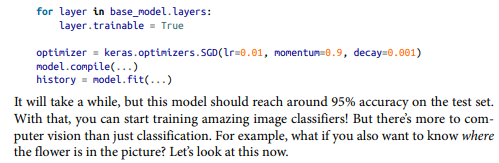